### Problem Definition

Investigation on the dynamics of fraud from various online payment platforms. Analysis is aimed at determining the platform that is most prone to fraud with the intention to develop the required action to forestall future occurences.
                                    

### Exploratory Data Analysis

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv(r"C:\Users\PETER ADEYI\Desktop\DATA SCIENCE FULL STACK PROGRAM\CAPSTONE\Online Payment Fraud Detection.csv")

In [64]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [65]:
data.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [66]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [67]:
data.shape

(1048575, 10)

In [68]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [69]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [70]:
#checking the correlations

data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


In [71]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [72]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


<AxesSubplot:>

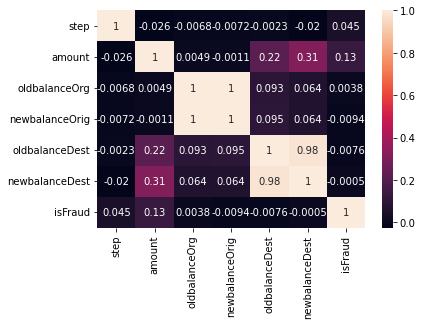

In [73]:
#visualize correlation using a seaborn heatmap

sns.heatmap(data.corr(),annot=True)

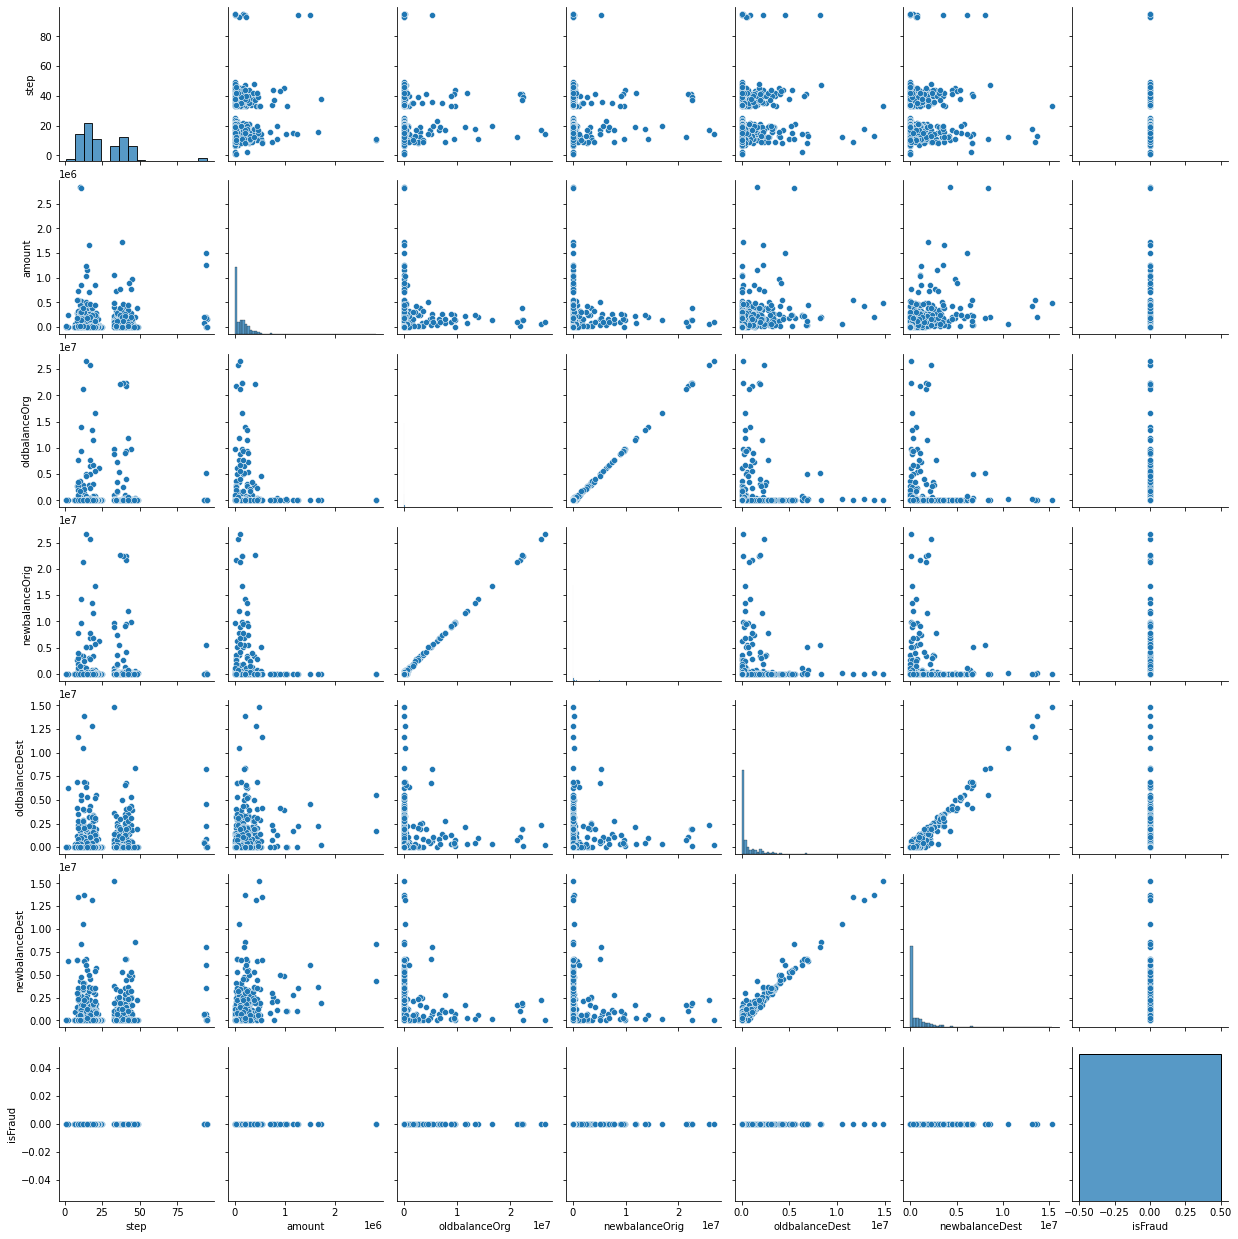

In [74]:
#visualize correlation a using seaborn pairplot

sns.pairplot(data.sample(500))
plt.show()

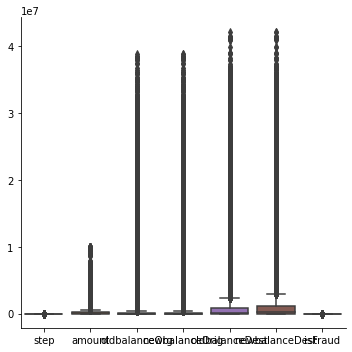

In [75]:
#visualize correlation using catplot

sns.catplot(data=data,kind='box')

In [76]:
data['amount'].sum()

166374223863.37

In [77]:
#total number of successful fraud and unsuccessful fraud
print('No of fraud transactions:{}, \n No of non-fraud transactions:{}'.format((data.isFraud==1).sum(), (data.isFraud==0).sum()))


No of fraud transactions:1142, 
 No of non-fraud transactions:1047433


In [78]:
#listing the senders

data['nameOrig'].head()

0    C1231006815
1    C1666544295
2    C1305486145
3     C840083671
4    C2048537720
Name: nameOrig, dtype: object

In [79]:
#listing the channels used to defraud

data['type'].head()

0     PAYMENT
1     PAYMENT
2    TRANSFER
3    CASH_OUT
4     PAYMENT
Name: type, dtype: object

In [80]:
#listing the receiver of the fraud

data['nameDest'].head()

0    M1979787155
1    M2044282225
2     C553264065
3      C38997010
4    M1230701703
Name: nameDest, dtype: object

In [81]:
#Defrauded customers

data.groupby('nameOrig').amount.sum().sort_values(ascending=False)[::]

nameOrig
C538142346     10000000.00
C792651637     10000000.00
C1237313447    10000000.00
C53057884      10000000.00
C1439740840    10000000.00
                  ...     
C402638409            0.30
C2021685600           0.26
C417208094            0.20
C570870355            0.14
C938188576            0.10
Name: amount, Length: 1048317, dtype: float64

In [82]:
#top 10 defrauded customers

data.groupby('nameOrig').amount.sum().sort_values(ascending=False)[:10]

nameOrig
C538142346     10000000.0
C792651637     10000000.0
C1237313447    10000000.0
C53057884      10000000.0
C1439740840    10000000.0
C7162498       10000000.0
C1843531771    10000000.0
C1438388258    10000000.0
C2050703310    10000000.0
C824646662     10000000.0
Name: amount, dtype: float64

In [83]:
#top 10 defrauded customers assigned to top10_customers

top10_customers = data.groupby('nameOrig').amount.sum().sort_values(ascending=False)[:10]

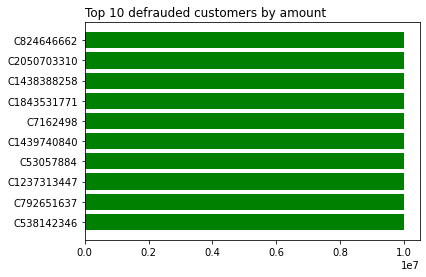

In [84]:
#use horizontal bar chart to visualize top 10 defrauded customers
#use the series index as vertical axis and series values as horizontal axis of the barh() plot
plt.title('Top 10 defrauded customers by amount',
             loc ='left', )
plt.barh(y=top10_customers.index, width=top10_customers, color='green')

plt.show()

In [85]:
#average time used to defraud a customers

data.groupby('nameOrig').step.mean().sort_values(ascending=False)[::]

nameOrig
C1834358749    95.0
C436398820     95.0
C2049648206    95.0
C74127546      95.0
C1725002049    95.0
               ... 
C722513129      1.0
C1798861270     1.0
C1061018585     1.0
C722417467      1.0
C1108889615     1.0
Name: step, Length: 1048317, dtype: float64

In [86]:
#online transaction with the highest fraud

data.groupby('type').isFraud.count().sort_values(ascending=False)[:5]

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: isFraud, dtype: int64

In [87]:
#assigning type to the online transaction by the number of transaction

type = data.groupby('type').isFraud.count().sort_values(ascending=False)[:5]

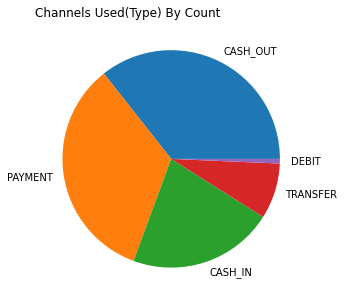

In [88]:
#using pie chart to visualize the type

#let's try a pie chart


plt.figure(figsize=(5,5))
plt.pie(type,labels=type.index)

plt.title('Channels Used(Type) By Count',
             loc ='left', )
plt.show()

In [89]:
#assigning top 10 earner from the fraud

top10_earners = data.groupby('nameDest').newbalanceDest.sum().sort_values(ascending=False)[:10]

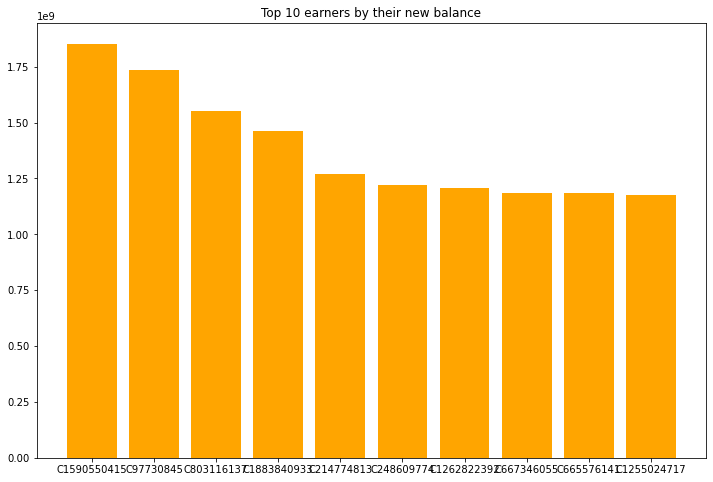

In [90]:
# use vertical plot bar to visualize top 10 earners from the fraud

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.title('Top 10 earners by their new balance')
plt.bar(x=top10_earners.index[:10], height=top10_earners[:10], color='orange')

plt.show()

In [91]:
#online transaction with the highest amount defrauded

data.groupby('type').newbalanceDest.sum().sort_values(ascending=False)[::]

type
CASH_OUT    6.106446e+11
CASH_IN     3.133747e+11
TRANSFER    2.346707e+11
DEBIT       9.630203e+09
PAYMENT     0.000000e+00
Name: newbalanceDest, dtype: float64

In [92]:
#assigning hightest_type to the online transaction

highest_type = data.groupby('type').newbalanceDest.sum().sort_values(ascending=False)[::]

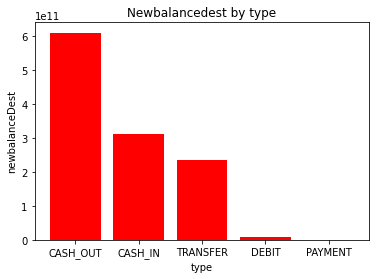

In [93]:
#use vertical bar chart to visualize highest amount received by the receiver by type

plt.bar(x=highest_type.index[:10], height=highest_type[:10],color = 'red')

plt.title('Newbalancedest by type')
plt.xlabel('type')
plt.ylabel('newbalanceDest')

plt.show()


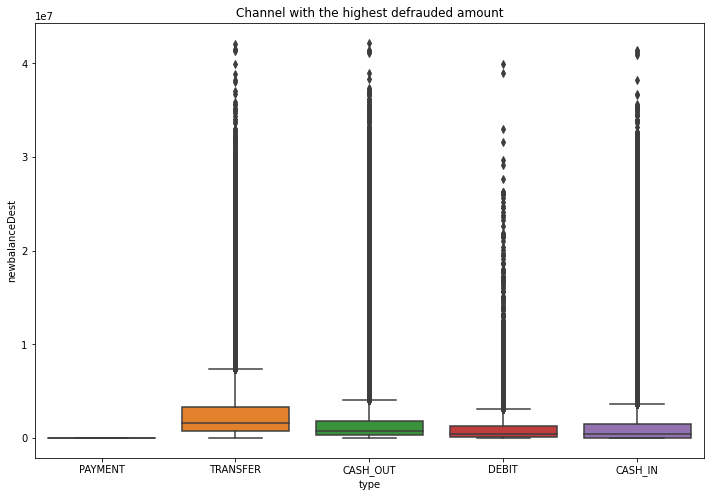

In [94]:
#use vertical boxplot to visualize highest amount defrauded​ by type
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.title('Top 10 earners')


plt.title('Channel with the highest defrauded amount')
sns.boxplot(x='type', y='newbalanceDest', data=data)

plt.show()

In [95]:
#customers that reported the fraud

data.groupby('nameOrig').isFraud.count().sort_values(ascending=False)[:10]

nameOrig
C664297940     2
C1876692952    2
C1095346997    2
C1039623203    2
C118275378     2
C304492801     2
C1026010130    2
C552905269     2
C563955235     2
C1959089715    2
Name: isFraud, dtype: int64

#### Model selection, training, and validation
a) Train and test at least 2 supervised learning model

In [96]:
#import the model from scikit learn
from sklearn.tree import DecisionTreeRegressor


In [97]:
#create an instance of the model
data_model = DecisionTreeRegressor(random_state=42)

In [98]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [99]:
y = data.amount

In [100]:
y.head()

0     9839.64
1     1864.28
2      181.00
3      181.00
4    11668.14
Name: amount, dtype: float64

In [101]:
feature_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

In [102]:
X = data[feature_columns]

In [103]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [104]:

#fit your model to your data, i.e. train your model

data_model.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [105]:
#predict fraud amount

preds = data_model.predict(X)

In [106]:
#for knowledge sake, compare actual prices with predicted prices
#remember y contains actual prices and preds contains the predicted prices

print('Actual Amount:', y.head().tolist())
print('Predicted Amount:', preds[:5])

Actual Amount: [9839.64, 1864.28, 181.0, 181.0, 11668.14]
Predicted Amount: [ 9839.64  1864.28   181.     181.   11668.14]


In [107]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y,preds)
print(mae)

3.4109783910651103e-06


In [108]:
#import train test split
from sklearn.model_selection import train_test_split

In [109]:
#split your data into training and testing sets
# 70:30, 60:40 are common splits

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [110]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (734002, 7)
X_test:  (314573, 7)
y_train:  (734002,)
y_test:  (314573,)


In [111]:
#retrain model

data_model.fit(X_train,y_train)

#predict on the test data
preds2 = data_model.predict(X_test)

In [112]:
#manually compare

print(y_test.head().tolist())
print(preds2[:5])

[7835.31, 67269.74, 242993.51, 66724.22, 373797.65]
[  7835.3   67269.22 242993.86  66724.31 373799.68]


In [113]:
#get mean absolute error

mae2 = mean_absolute_error(y_test,preds2)

print('Without splitting',mae)
print('With splitting',mae2)

Without splitting 3.4109783910651103e-06
With splitting 12.063377133447569


In [114]:
from sklearn.ensemble import RandomForestRegressor

data_RF_model = RandomForestRegressor()

In [115]:
#fit your model on the training data
data_RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [116]:
#predict on test data
preds_RF = data_RF_model.predict(X_test)

In [117]:
#manually compare

print(y_test.head().tolist())
print(preds_RF[:5])

[7835.31, 67269.74, 242993.51, 66724.22, 373797.65]
[  7835.3264  67269.2929 242993.4564  66724.2018 373798.9545]


In [118]:
#calculate error
mae_RF = mean_absolute_error(y_test,preds_RF)

print('Decision tree with train test split: ',mae2)
print('Random Forest with train test split: ',mae_RF)

Decision tree with train test split:  12.063377133447569
Random Forest with train test split:  8.954176063305317


In [119]:
pd.Series(preds_RF).astype(int).head()

0      7835
1     67269
2    242993
3     66724
4    373798
dtype: int32